In [62]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [95]:
#for one year
end_date = today.strftime('%Y-%m-%d')
start_date = (today - timedelta(days=365)).strftime('%Y-%m-%d')

In [96]:
data = yf.download('PI', start=start_date, end=end_date, progress=False) #for IMPINJ Inc stock

In [97]:
data['Date'] = data.index
data = data[['Date', 'Close']]
data.reset_index(inplace=True, drop=True)

In [98]:
data.head()

,Date,Close
0,2022-09-06,85.820000
1,2022-09-07,88.059998
2,2022-09-08,88.599998
3,2022-09-09,91.599998
4,2022-09-12,92.360001


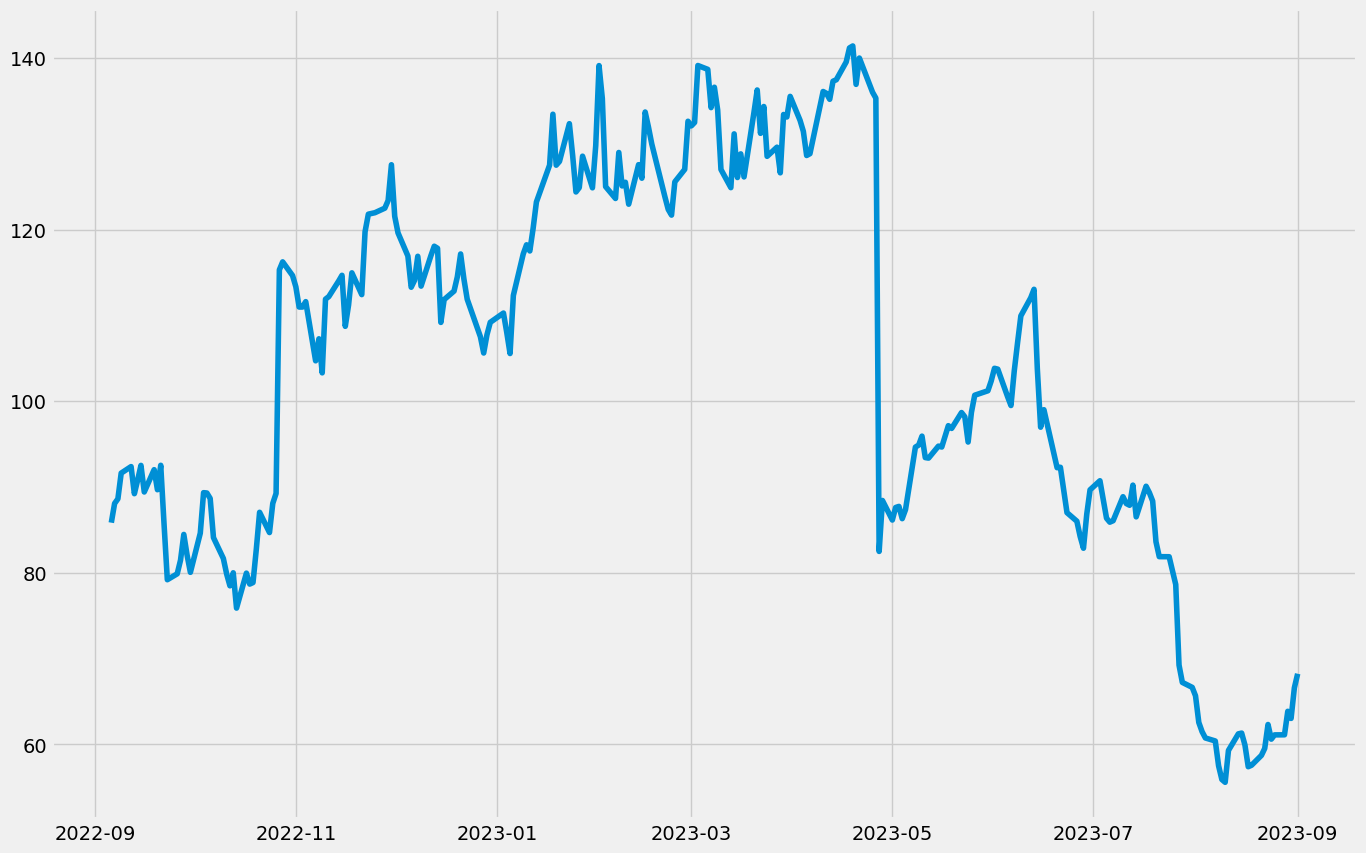

In [99]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data['Date'], data["Close"])

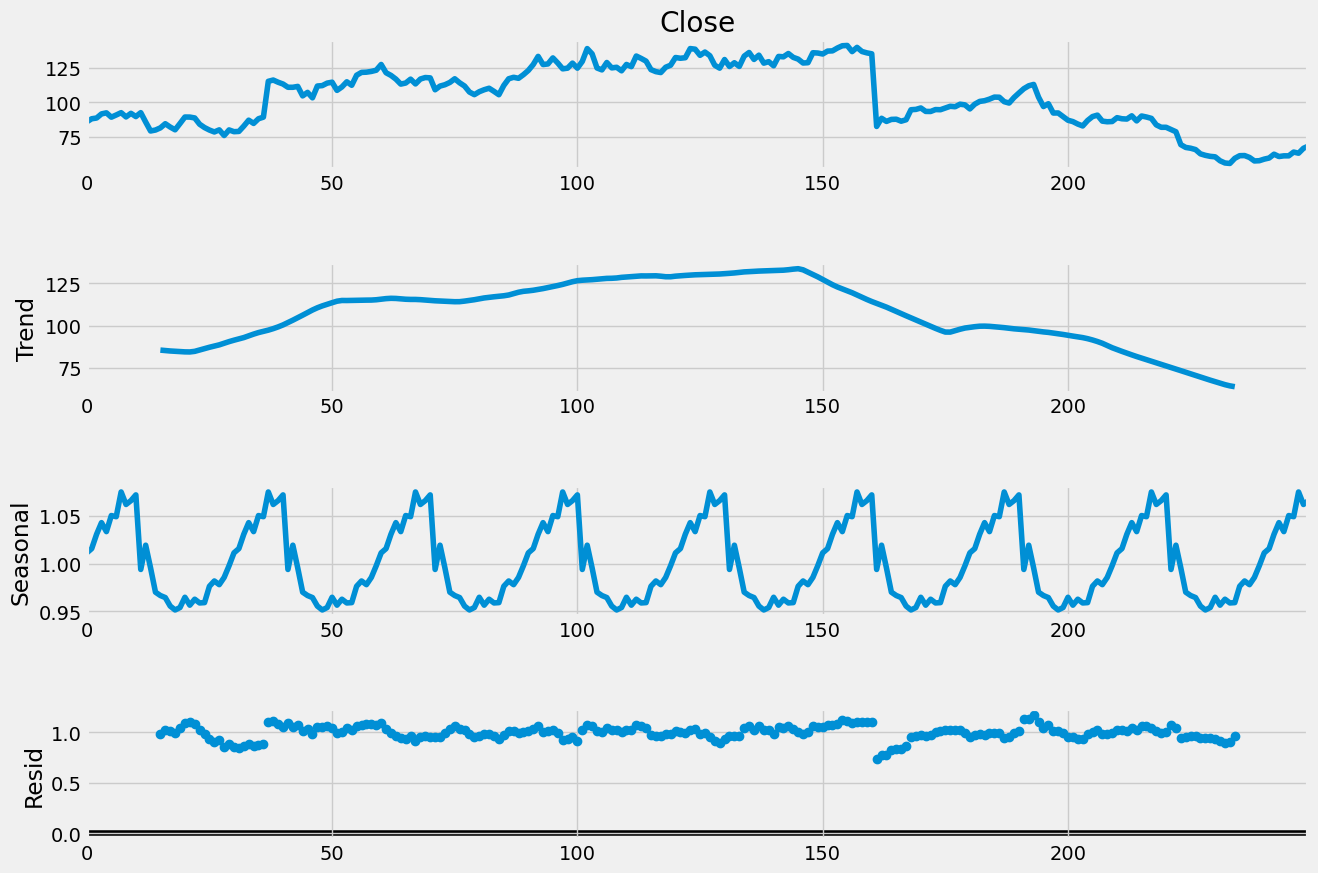

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
fig = result.plot()  
fig.set_size_inches(15, 10)

Our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA)
First we need the value of p, d, and q.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

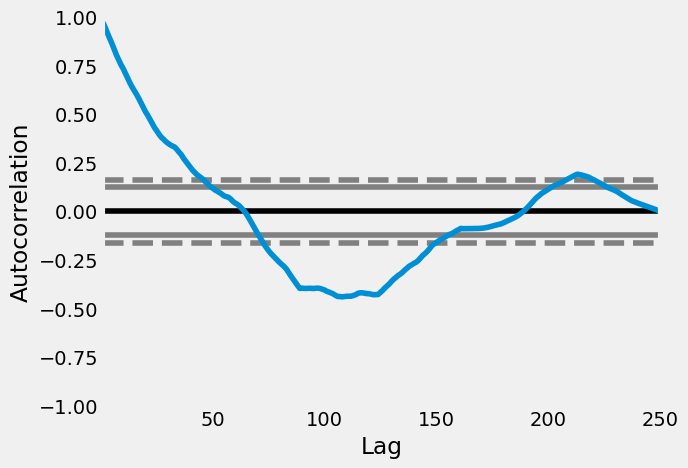

In [101]:
#finding p
pd.plotting.autocorrelation_plot(data["Close"])

/Users/edinsonjimenezarita/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


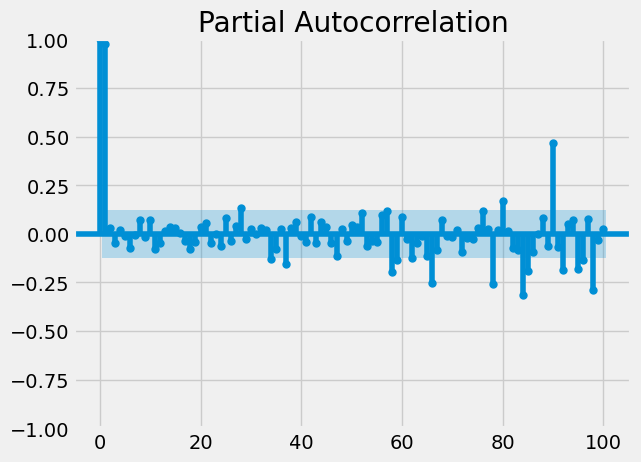

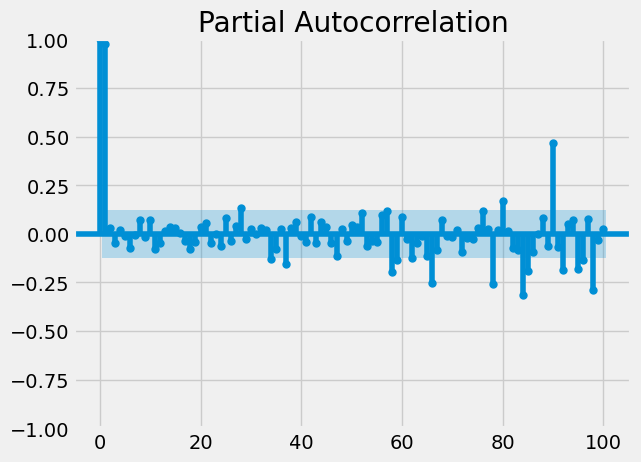

In [102]:
#finding q
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [103]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit()  
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -754.527
Date:                Mon, 04 Sep 2023   AIC                           1525.055
Time:                        15:38:39   BIC                           1553.194
Sample:                             0   HQIC                          1536.381
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0036      3.351      0.001      0.999      -6.564       6.571
ar.L2          0.8109      2.988      0.271      0.786      -5.045       6.666
ar.L3          0.0114      0.247      0.046      0.963      -0.473       0.495
ar.L4         -0.0296      0.224     -0.132      0.895      -0.469       0.409
ar.L5         -0.0019      0.133     -0.014      0.989      -0.263       0.260
ma.L1         -0.0562      3.352     -0.017      0.987      -6.627       6.514
ma.L2         -0.7958      3.173     -0.251      0.802      -7.015       5.423
sigma2        25.0892      0.661     37.958      0.000      23.794      26.385
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             26786.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -4.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
predictions = fitted.predict()
predictions

0       0.000000
1      85.819890
2      87.946690
3      88.610212
4      91.401050
         ...    
245    61.116515
246    61.244579
247    63.774763
248    63.193557
249    66.366533
Name: predicted_mean, Length: 250, dtype: float64

Now SARIMA

In [106]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model=model.fit()
model.summary()

/Users/edinsonjimenezarita/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/edinsonjimenezarita/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.05379D+00    |proj g|=  5.79950D-02


 This problem is unconstrained.



At iterate    5    f=  2.98353D+00    |proj g|=  8.66153D-02

At iterate   10    f=  2.96417D+00    |proj g|=  4.27662D-02

At iterate   15    f=  2.93934D+00    |proj g|=  2.72041D-02

At iterate   20    f=  2.93459D+00    |proj g|=  6.19898D-03

At iterate   25    f=  2.93413D+00    |proj g|=  1.91927D-03

At iterate   30    f=  2.93410D+00    |proj g|=  1.60086D-03

At iterate   35    f=  2.93392D+00    |proj g|=  5.35508D-03

At iterate   40    f=  2.93382D+00    |proj g|=  1.41730D-03

At iterate   45    f=  2.93381D+00    |proj g|=  6.35082D-04


/Users/edinsonjimenezarita/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.93375D+00    |proj g|=  2.43939D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     55      1     0     0   2.439D-03   2.934D+00
  F =   2.9337505210216004     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -733.438
Date:                            Mon, 04 Sep 2023   AIC                           1496.875
Time:                                    15:43:55   BIC                           1548.896
Sample:                                         0   HQIC                          1517.843
                                            - 250                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0128      1.675     -0.008      0.994      -3.296       3.270
ar.L2         -0.1613      1.018     -0.158      0.874      -2.156       1.834
ar.L3         -0.0616      0.135     -0.457      0.647      -0.326       0.203
ar.L4         -0.0024      0.186     -0.013      0.990      -0.367       0.362
ar.L5          0.0616      0.157      0.393      0.695      -0.246       0.369
ma.L1         -0.0230      1.657     -0.014      0.989      -3.270       3.224
ma.L2          0.1688      0.995      0.170      0.865      -1.781       2.119
ar.S.L12      -0.9826      1.576     -0.623      0.533      -4.072       2.106
ar.S.L24      -0.1006      0.244     -0.412      0.680      -0.579       0.378
ar.S.L36       0.0627      0.254      0.247      0.805      -0.435       0.561
ar.S.L48       0.1703      0.337      0.505      0.613      -0.490       0.831
ar.S.L60       0.0015      0.153      0.010      0.992      -0.299       0.302
ma.S.L12      -0.0201     70.633     -0.000      1.000    -138.458     138.418
ma.S.L24      -0.9795     69.490     -0.014      0.989    -137.178     135.219
sigma2        24.3800   1723.450      0.014      0.989   -3353.521    3402.280
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             18904.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -3.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
predictions = model.predict(len(data), len(data)+10)
predictions

250    68.203835
251    68.841470
252    68.633893
253    70.177503
254    70.159186
255    69.625013
256    69.672565
257    66.224462
258    66.256085
259    63.925384
260    63.465175
Name: predicted_mean, dtype: float64

<Axes: >

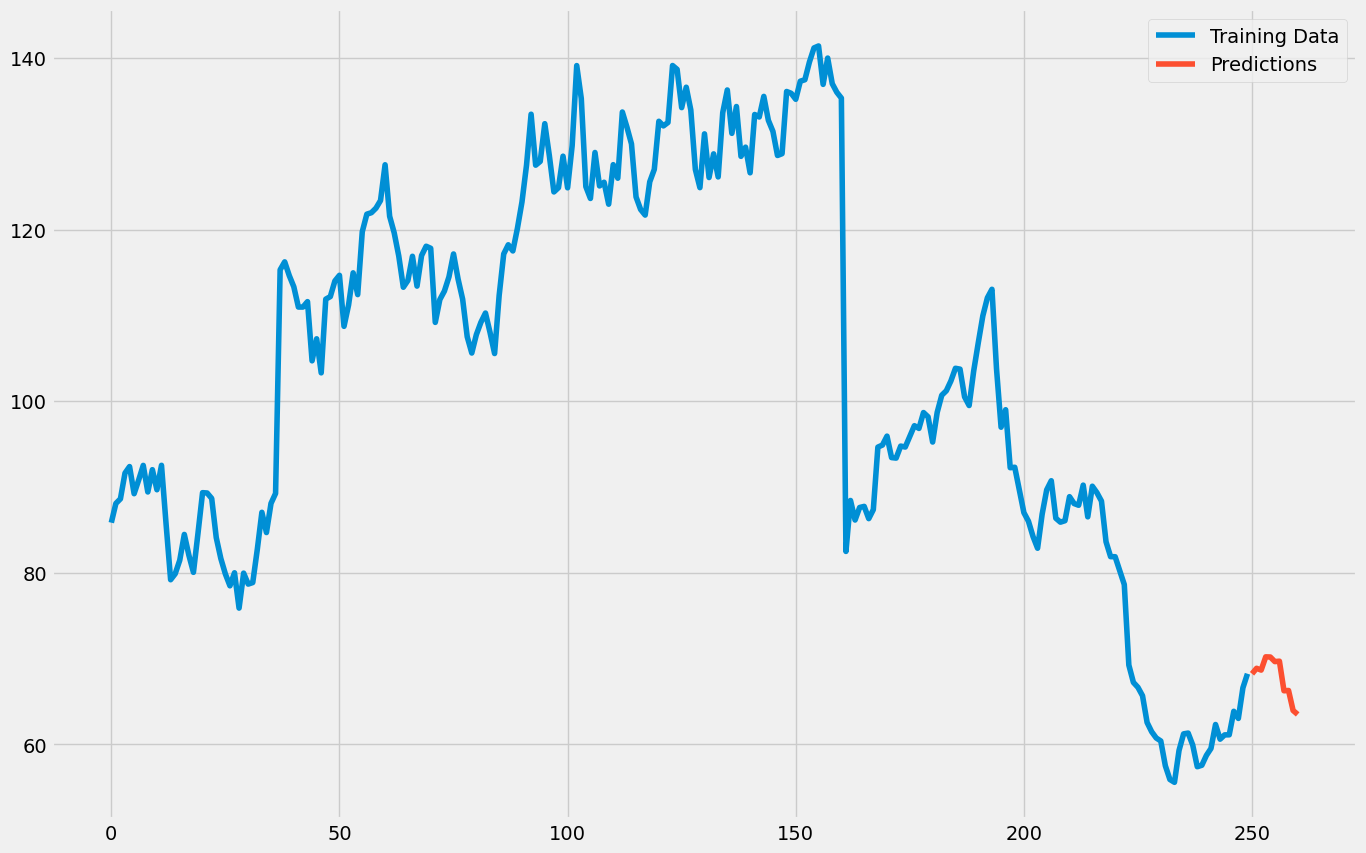

In [108]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

This is actually wrong because even though we managed to fit the model given the seasonality. I ignored the trend factor, which is very present in this dataset. Therefore the timeseries is NOT stationary and my predictions are likely wrong. 